In [221]:
import pandas as pd
import numpy as np

In [222]:
df=pd.read_csv('data/housing.csv')

In [223]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [225]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [226]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [227]:
df['total_bedrooms'].isnull().sum()

207

In [228]:
df['total_bedrooms'].describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [229]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [230]:
df['rooms_per_household'] = df['total_rooms'] // df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] // df['households']

In [231]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0,0.146591,2.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0,0.155797,2.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.0,0.129516,2.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.0,0.184458,2.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.0,0.172096,2.0


In [232]:
df.bedrooms_per_room.unique()

array([0.14659091, 0.15579659, 0.12951602, ..., 0.21517303, 0.21989247,
       0.22118492])

In [233]:
df.population_per_household.unique()

array([2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 1.000e+01, 5.000e+00,
       1.200e+01, 9.000e+00, 1.700e+01, 1.100e+01, 6.000e+00, 1.400e+01,
       5.990e+02, 1.800e+01, 7.000e+00, 0.000e+00, 2.100e+01, 1.500e+01,
       4.100e+01, 8.300e+01, 8.000e+00, 6.300e+01, 2.300e+02, 3.300e+01,
       1.300e+01, 5.100e+01, 5.020e+02, 1.600e+01, 1.243e+03, 1.900e+01])

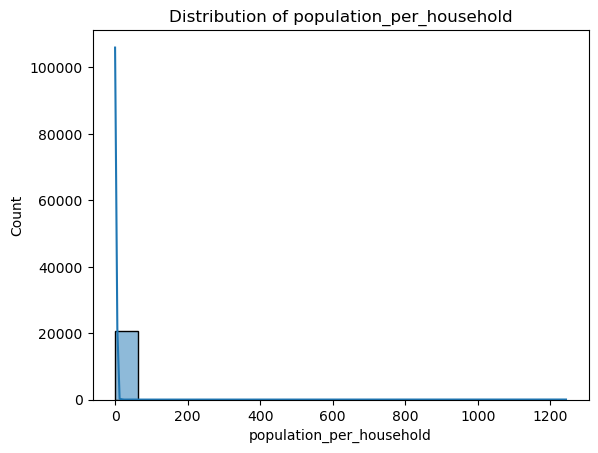

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df.population_per_household, bins=20, kde=True)
plt.title('Distribution of population_per_household')
plt.show()

In [235]:
df = df[df.population_per_household < 20]

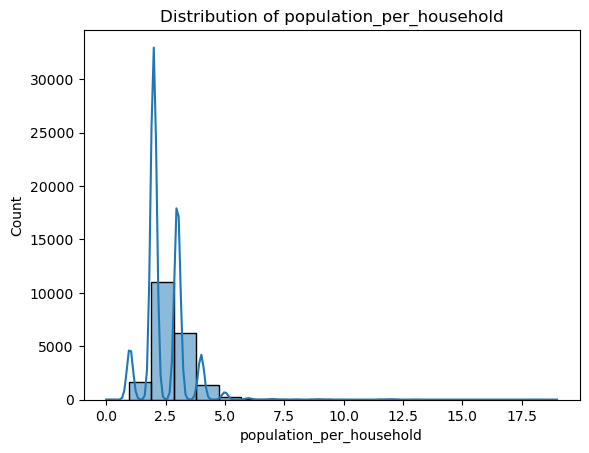

In [236]:
sns.histplot(df.population_per_household, bins=20, kde=True)
plt.title('Distribution of population_per_household')
plt.show()

In [237]:
df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688447
rooms_per_household         0.151067
total_rooms                 0.134265
housing_median_age          0.105375
households                  0.065929
total_bedrooms              0.049529
population                 -0.024555
longitude                  -0.046054
latitude                   -0.143997
bedrooms_per_room          -0.233259
population_per_household   -0.233694
Name: median_house_value, dtype: float64

In [238]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0,0.146591,2.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0,0.155797,2.0


In [239]:
df=df.drop(['bedrooms_per_room','population_per_household'],axis=1)

In [240]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0


In [241]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [242]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9135
INLAND        6543
NEAR OCEAN    2657
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

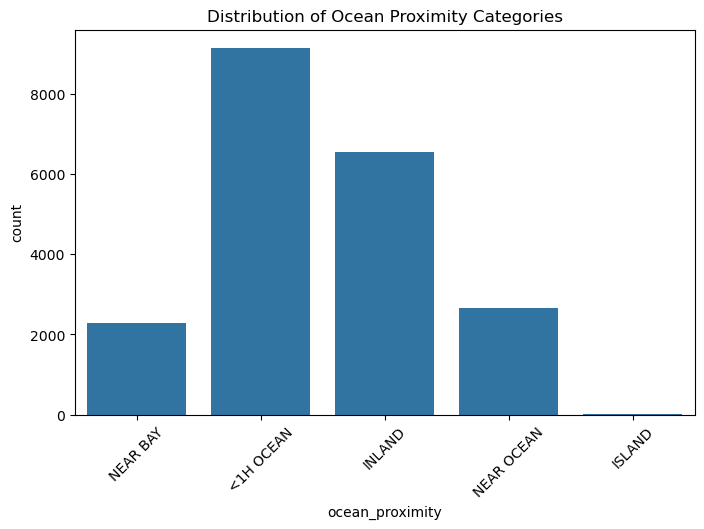

In [243]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='ocean_proximity')
plt.title("Distribution of Ocean Proximity Categories")
plt.xticks(rotation=45)
plt.show()

In [244]:
df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249396.127964
<1H OCEAN     240055.832622
INLAND        124758.478221
Name: median_house_value, dtype: float64

In [245]:
df=df[df['ocean_proximity'] != 'ISLAND']

In [246]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9135
INLAND        6543
NEAR OCEAN    2657
NEAR BAY      2290
Name: count, dtype: int64

In [247]:
df=pd.get_dummies(df,columns=['ocean_proximity'], drop_first=True)

In [248]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.0,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.0,False,True,False


In [249]:
y=df.median_house_value
X=df.drop('median_house_value',axis='columns')

In [250]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [252]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [253]:
model.score(X_test,y_test)

0.6260704296938036

In [254]:
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 71198.41334398524


In [255]:
from sklearn.ensemble import RandomForestRegressor

rfr_model=RandomForestRegressor(n_estimators=100,random_state=35)

In [256]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor(random_state=35)

In [257]:
y_pred = rfr_model.predict(X_test)

mse_rf = mean_squared_error(y_test,y_pred)
rmse_rf = mse_rf ** 0.5

print("Random Forest R² Score:", rfr_model.score(X_test,y_test))
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest R² Score: 0.8145020501355117
Random Forest RMSE: 50147.00120956502


In [258]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [259]:
dt_model = DecisionTreeRegressor(random_state=35)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=35)

In [260]:
y_pred = dt_model.predict(X_test)

In [261]:
mse_dt = mean_squared_error(y_test,y_pred)
rmse_dt = mse_dt ** 0.5

In [262]:
print("Decision Tree R² Score: ", dt_model.score(X_test,y_test))
print(f"Decision Tree RMSE: {rmse_dt}")

Decision Tree R² Score:  0.6613980760474611
Decision Tree RMSE: 67751.68816818537


In [263]:
from sklearn.ensemble import GradientBoostingRegressor

In [264]:
gb_model = GradientBoostingRegressor(random_state=35)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=35)

In [265]:
y_pred_gb = gb_model.predict(X_test)

In [266]:
rmse_gb = np.sqrt(mean_squared_error(y_test,y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

In [267]:
print("Gradient Boosting R² Score:", r2_gb)
print("Gradient Boosting RMSE:", rmse_gb)

Gradient Boosting R² Score: 0.7636545235976332
Gradient Boosting RMSE: 56604.252223238414


In [268]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [269]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=35)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [270]:
y_pred_xgb = xgb_model.predict(X_test)

In [271]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

In [272]:
print("XGBoost R² Score:", r2_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost R² Score: 0.8115941949904191
XGBoost RMSE: 50538.52355253984


In [273]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators' : [100,200],
    'max_depth' : [10,20,None],
    'min_samples_split' : [2,5,10],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rfr_model,
                          param_grid=param_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          verbose=2,
                          n_jobs=-1)

In [274]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   4.8s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_featu

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=35), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [275]:
best_rf = grid_search.best_estimator_

In [276]:
y_pred_best_rf = best_rf.predict(X_test)

In [277]:
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best = r2_score(y_test, y_pred_best_rf)

In [278]:
print("Best RF RMSE:", rmse_best)
print("Best RF R² Score:", r2_best)
print("Best Params:", grid_search.best_params_)

Best RF RMSE: 51060.19351735626
Best RF R² Score: 0.8076845867954839
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [279]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1)

In [280]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   5.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   5.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   5.7s
[CV] END max_depth=None, max_feat

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_split=10, n_estimators=200; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [281]:
best_xgb = grid_search_xgb.best_estimator_

In [282]:
y_pred_best_xgb = best_xgb.predict(X_test)

In [283]:
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

In [284]:
print("Best XGBoost RMSE:", rmse_best_xgb)
print("Best XGBoost R² Score:", r2_best_xgb)
print("Best XGBoost Params:", grid_search_xgb.best_params_)

Best XGBoost RMSE: 46680.708100131546
Best XGBoost R² Score: 0.8392599681824627
Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


In [348]:
import xgboost

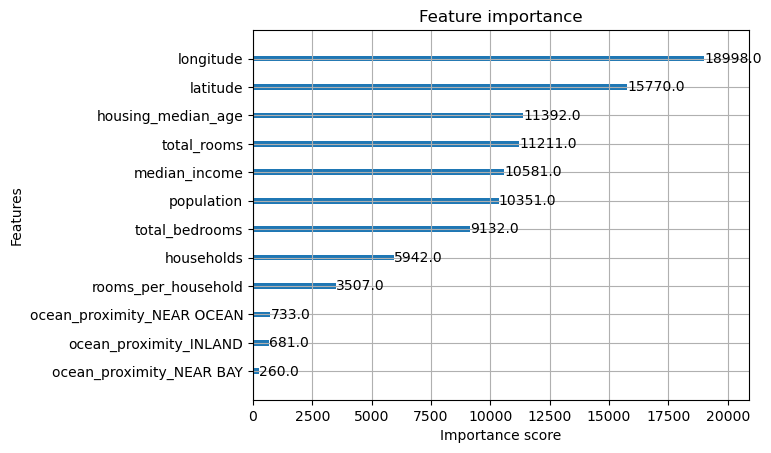

In [350]:
xgboost.plot_importance(best_xgb, importance_type='weight')
plt.show()

In [285]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [286]:
import joblib

In [287]:
joblib.dump(best_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']